In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

In [4]:
#行動データ
work_detail = pd.read_csv('../../datas/groupby_widedata/work_detail.csv')
work_env = pd.read_csv('../../datas/groupby_widedata/work_env.csv')
#fitbitデータ
calories = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/calories_day.csv')
floors = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/floors_day.csv')
heart = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/heart_day.csv')
minutesFairlyActive= pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/minutesFairlyActive_day.csv')
minutesLightlyActive = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/minutesLightlyActive_day.csv')
minutesSedentary = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/minutesSedentary_day.csv')
minutesVeryActive = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/minutesVeryActive_day.csv')
steps = pd.read_csv('../../datas/fitbit_preprocessed_data/agg_for_day/steps_day.csv')
sleep = pd.read_csv('../../datas/fitbit_preprocessed_data/sleep.csv')
#アンケートデータ
morning_bodyfatigue = pd.read_csv('./analyse_data/questionaire_data/morning_bodyfatigue.csv')
morning_dams = pd.read_csv('./analyse_data/questionaire_data/morning_dams.csv')
night_w_bodyfatigue = pd.read_csv('./analyse_data/questionaire_data/night_w_bodyfatigue.csv')
night_w_dams = pd.read_csv('./analyse_data/questionaire_data/night_w_dams.csv')
night_w_eval = pd.read_csv('./analyse_data/questionaire_data/night_w_eval.csv')
night_w_productivity = pd.read_csv('./analyse_data/questionaire_data/night_w_productivity.csv')
night_w_recover = pd.read_csv('./analyse_data/questionaire_data/night_w_recover.csv')
night_w_workenga = pd.read_csv('./analyse_data/questionaire_data/night_w_workenga.csv')
#天気データ


In [37]:
night_w_dams['positive_score'] = night_w_dams['haturatu']+night_w_dams['tanosii']+night_w_dams['uresii']/3
night_w_dams['depressive_score'] = night_w_dams['kurai']+night_w_dams['iyana']+night_w_dams['sizunda']/3
night_w_dams['anxious_score'] = night_w_dams['kigakari']+night_w_dams['fuan']+night_w_dams['sinpai']/3

## アンケートデータの前処理

In [24]:
# under_40 = morning_bodyfatigue['value_nemuke'].quantile(0.4)
# upper_60 = morning_bodyfatigue['value_nemuke'].quantile(0.6)
# morning_bodyfatigue.loc[morning_bodyfatigue['value_nemuke']<=under_40,'value_nemuke_label']=0
# morning_bodyfatigue.loc[morning_bodyfatigue['value_nemuke']>=upper_60,'value_nemuke_label']=2
# morning_bodyfatigue.loc[(morning_bodyfatigue['value_nemuke']<upper_60)&(morning_bodyfatigue['value_nemuke']>under_40),'value_nemuke_label']=1

In [26]:
#目的変数のラベルづけ
#下位40%と上位40％の二値分類をする
def labeling(df, colmn):
    under_40 = df[colmn].quantile(0.4)
    upper_60 = df[colmn].quantile(0.6)
    df.loc[df[colmn]<=under_40,colmn + '_label']=0
    df.loc[df[colmn]>=upper_60,colmn + '_label']=2
    df.loc[(df[colmn]<upper_60)&(df[colmn]>under_40),colmn + '_label']=1

In [35]:
labeling(morning_bodyfatigue, 'value_hukai')
labeling(morning_bodyfatigue, 'value_boyake')
labeling(morning_bodyfatigue, 'value_nemuke')
labeling(morning_dams, 'positive_score')
labeling(morning_dams, 'depressive_score')
labeling(morning_dams, 'anxious_score')

labeling(night_w_bodyfatigue, 'value_hukai')
labeling(night_w_bodyfatigue, 'value_boyake')
labeling(night_w_bodyfatigue, 'value_nemuke')
labeling(night_w_dams, 'positive_score')
labeling(night_w_dams, 'depressive_score')
labeling(night_w_dams, 'anxious_score')

labeli

KeyError: 'positive_score'

<AxesSubplot:>

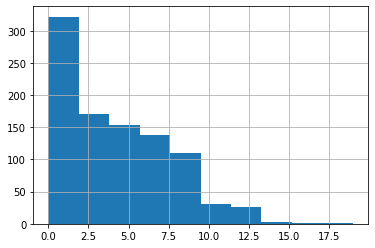

In [40]:
# morning_dams['positive_score_label'].hist()
night_w_dams['anxious_score'].hist()